In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import pandas as pd
import yfinance as yf
from statsmodels.stats.stattools import durbin_watson, jarque_bera

In [5]:
tickers = ['AAPL', 'BAC', 'INTC', 'GME', 'BA', 'BABA', 'UA', 'KO', 'NVDA', 'META']

In [6]:
data = yf.download(tickers, start = '2018-01-01', end = '2021-01-01', group_by = 'ticker', threads = True)

[*********************100%***********************]  10 of 10 completed


In [9]:
data.stack()

C:\Users\dfdop\AppData\Local\Temp\ipykernel_19948\2489631911.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data.stack()


Ticker                      UA           GME  ...          INTC          META
Date       Price                              ...                            
2018-01-02 Close        13.970  3.988464e+00  ...  3.933038e+01  1.805690e+02
           High         14.010  3.995017e+00  ...  3.937235e+01  1.807282e+02
           Low          13.230  3.883619e+00  ...  3.879310e+01  1.767171e+02
           Open         13.450  3.922936e+00  ...  3.893581e+01  1.768465e+02
           Volume  6264809.000  1.133080e+07  ...  2.337080e+07  1.815190e+07
...                        ...           ...  ...           ...           ...
2020-12-31 Close        14.880  4.710000e+00  ...  4.503854e+01  2.718786e+02
           High         15.113  4.950000e+00  ...  4.537302e+01  2.757902e+02
           Low          14.810  4.700000e+00  ...  4.404411e+01  2.685443e+02
           Open         15.010  4.812500e+00  ...  4.407123e+01  2.707241e+02
           Volume  1981656.000  2.769080e+07  ...  2.857680e+07  1.290040e+07

[3780 rows x 10 columns]

<Axes: xlabel='Date'>

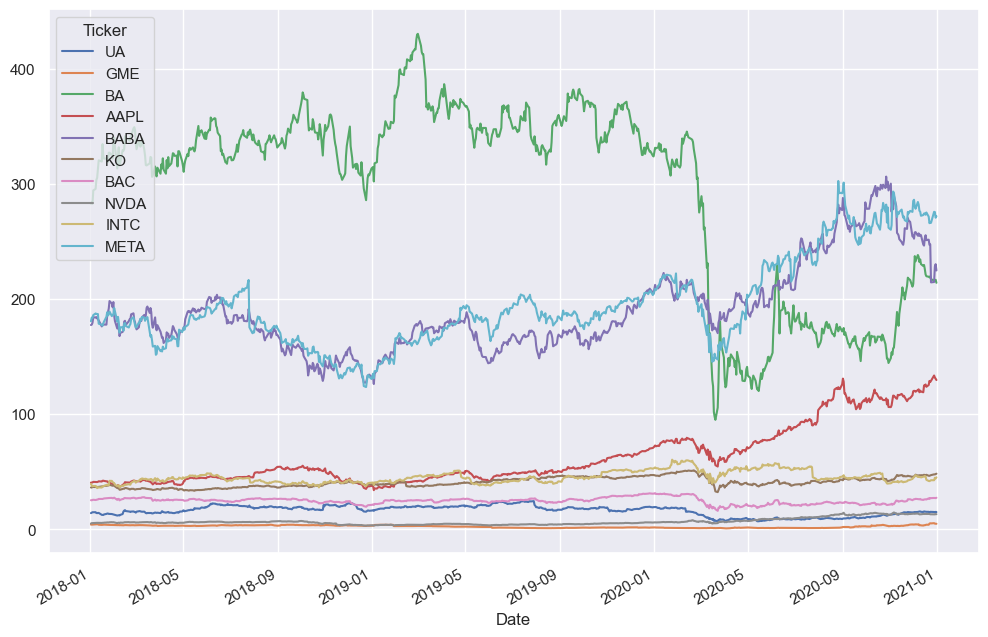

In [13]:
close_prices = data.xs('Close', axis = 1, level = 1)
close_prices.plot(kind = 'line', figsize = (12, 8))

<Axes: xlabel='Date'>

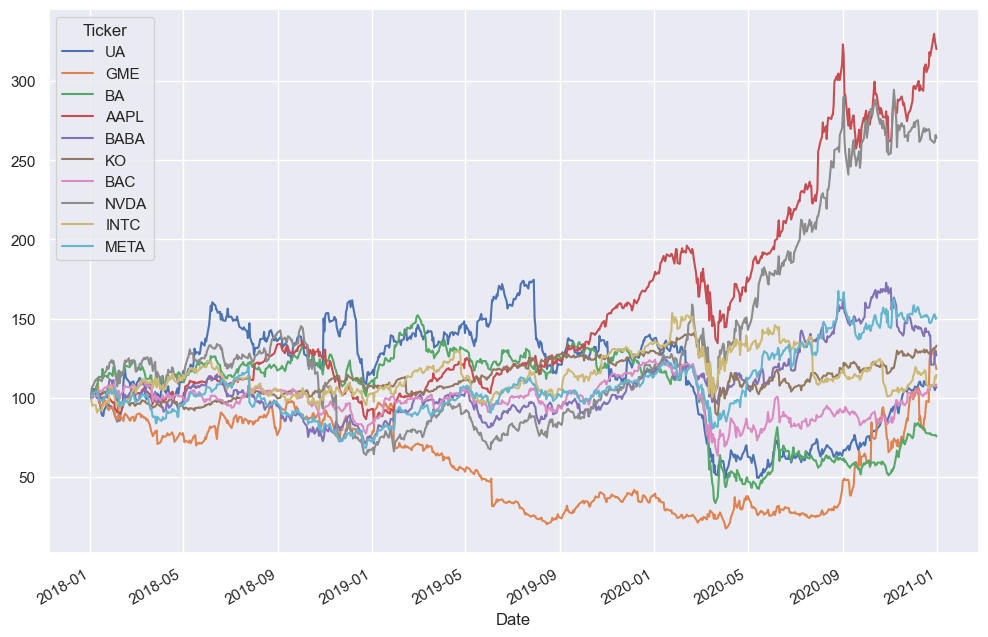

In [16]:
normalize_prices = close_prices.div(close_prices.iloc[0]).mul(100)
normalize_prices.plot(kind = 'line', figsize = (12, 8))

In [17]:
simple_retunrs = close_prices.pct_change().dropna()

<Axes: xlabel='Date'>

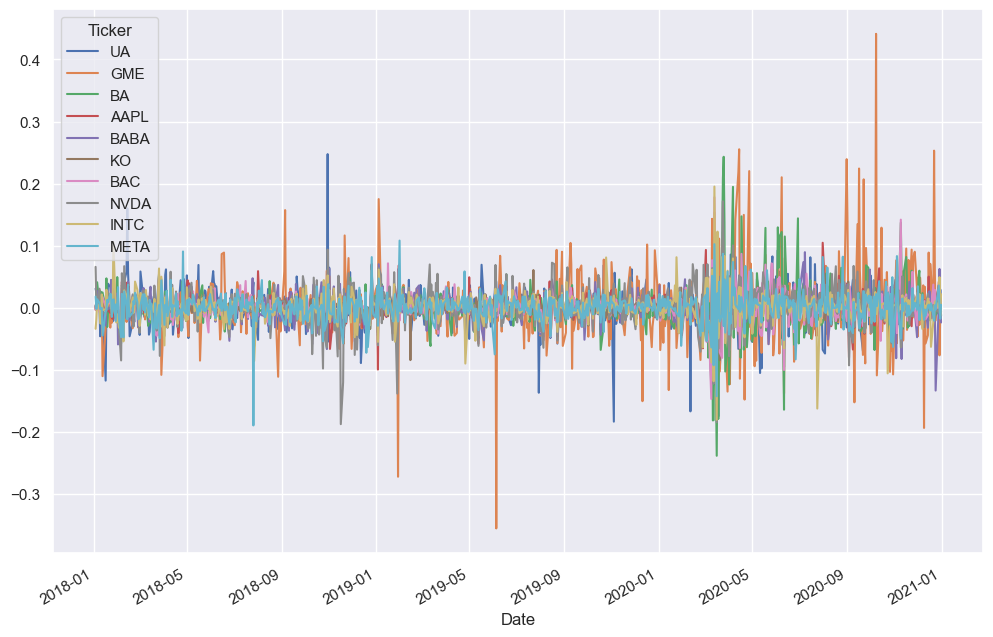

In [19]:
simple_retunrs.plot(kind = 'line', figsize = (12, 8))

In [25]:
daily_returns = simple_retunrs.mean()
daily_risk = simple_retunrs.std()

In [26]:
yearly_returns = daily_returns.apply(lambda x : (1 + x)**252 - 1)
yearly_risk = daily_risk.apply(lambda x : x * np.sqrt(252))

In [38]:
return_risk = pd.concat([yearly_returns, yearly_risk], axis=1)
return_risk.columns = ['yearly_returns', 'yearly_risk']

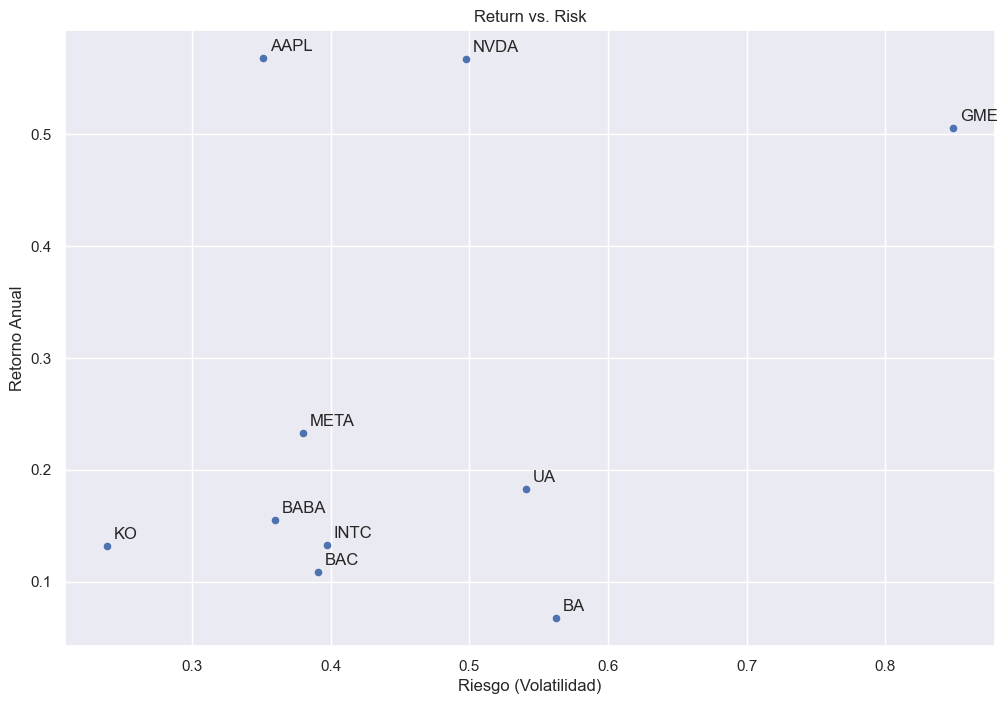

In [45]:
ax = return_risk.plot(
    kind = 'scatter',
    x = 'yearly_risk',
    y = 'yearly_returns',
    figsize = (12, 8),
    title = 'Return vs. Risk'
)

for ticker, row in return_risk.iterrows():
    ax.annotate(
        ticker,
        (row['yearly_risk'], row['yearly_returns']),
        xytext = (5, 5),
        textcoords = 'offset points'
    )
plt.xlabel('Riesgo (Volatilidad)')
plt.ylabel('Retorno Anual')
plt.show()